1. In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.

In [1]:
import pandas as pd
import numpy as np

nba = pd.read_csv('C:\\Users\\sapni\\Downloads\\iNeuron\\Assignments\\nba_2013.csv')
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
print(nba.columns.values)

['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


In [4]:
nba.isnull().any()

player          False
pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
fg.              True
x3p             False
x3pa            False
x3p.             True
x2p             False
x2pa            False
x2p.             True
efg.             True
ft              False
fta             False
ft.              True
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
season          False
season_end      False
dtype: bool

In [5]:
nba["fg."].fillna(nba["fg."].mean(),inplace=True)
nba["x2p."].fillna(nba["x2p."].mean(),inplace=True)
nba["efg."].fillna(nba["efg."].mean(),inplace=True)
nba["x3p."].fillna(nba["x3p."].mean(),inplace=True)
nba["ft."].fillna(nba["ft."].mean(),inplace=True)

In [7]:
distance_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
nba_numeric = nba[distance_columns]

In [9]:
nba_normalized = nba_numeric.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [10]:
nba_category = nba[['player','bref_team_id','season']]

In [11]:
nba = pd.concat([nba_category, nba_normalized], axis=1)
from sklearn.model_selection import train_test_split

x_columns = nba[['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']]

y_column = nba['pts']

x_train, x_test, y_train, y_test = train_test_split(x_columns, y_column, test_size=0.3, random_state=0)

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

for k in range(10):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    print('Regression Score is:', format(metrics.r2_score(y_test,y_pred),'.4f'),'for k_value:',k_value)

Regression Score is: 0.9145 for k_value: 1
Regression Score is: 0.9464 for k_value: 2
Regression Score is: 0.9548 for k_value: 3
Regression Score is: 0.9594 for k_value: 4
Regression Score is: 0.9583 for k_value: 5
Regression Score is: 0.9579 for k_value: 6
Regression Score is: 0.9579 for k_value: 7
Regression Score is: 0.9609 for k_value: 8
Regression Score is: 0.9576 for k_value: 9
Regression Score is: 0.9557 for k_value: 10


## K=8 gives highest prediction score

In [13]:
knn = KNeighborsRegressor(n_neighbors = 8)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print('Mean Squared Error is:',format(metrics.mean_squared_error(y_test,y_pred),'.7f'))
print('Regression Score is"',format(metrics.r2_score(y_test,y_pred),'.4f'))

Mean Squared Error is: 0.0011143
Regression Score is" 0.9609


In [14]:
Test_With_Predicted = pd.DataFrame({'Actual Points':y_test.tolist(),'Predicted Points': y_pred.tolist()})
Test_With_Predicted

,Actual Points,Predicted Points
0,0.168145,0.125723
1,0.276514,0.297243
2,0.422676,0.363189
3,0.007327,0.011088
4,0.381026,0.373939
...,...,...
140,0.426919,0.421664
141,0.013498,0.019379
142,0.312379,0.303943
143,0.306980,0.273766


2. In this assignment students have to find the frequency of words in a webpage. User can use urllib and BeautifulSoup to extract text from webpage.

In [17]:
from bs4 import BeautifulSoup 
import urllib.request 
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords 
response = urllib.request.urlopen('http://php.net/') 
html = response.read() 
soup = BeautifulSoup(html,"html5lib") 
text = soup.get_text(strip=True) 
tokens = [t for t in text.split()] 
clean_tokens = tokens[:] 
sr = stopwords.words('english') 
for token in tokens: 
    if token in stopwords.words('english'): 
        clean_tokens.remove(token) 
freq = nltk.FreqDist(clean_tokens) 
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sapni\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesErrorsExceptionsGeneratorsAttributesReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
CGI:1
binaryInstalled:1
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUser:1
Submitted:1
DataHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
BehaviourAudio:1
Formats:1
ManipulationAuthentica

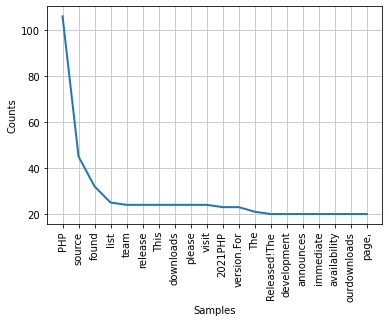

In [18]:
freq.plot(20,cumulative=False)

3. In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference.

In [19]:
import numpy as np
from scipy import misc
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
face = misc.face(gray=True)

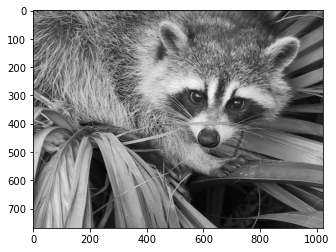

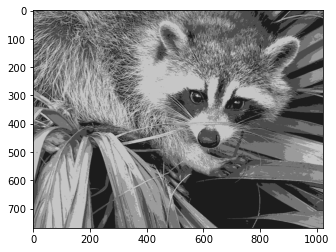

In [20]:
n_clusters = 5
np.random.seed(0)

X = face.reshape((-1,1))
k_means = KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

face_compressed = np.choose(labels,values)
face_compressed.shape = face.shape

vmin = face.min()
vmax = face.max()

plt.figure(1)
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)

plt.figure(2)
plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

4. In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.

In [25]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()

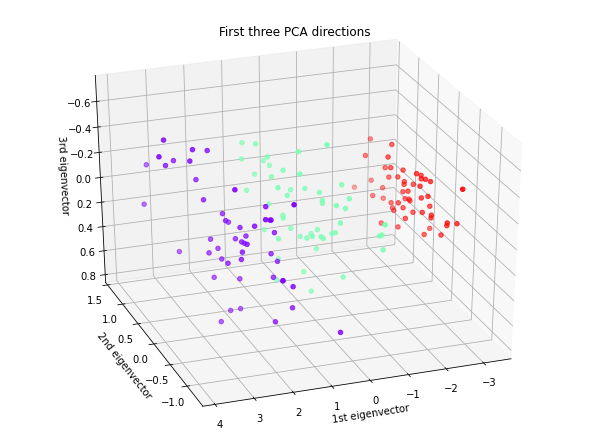

In [27]:
X_reduced = PCA(n_components = 3).fit_transform(iris.data)
Y = iris.target
fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:,0], X_reduced[:,1],X_reduced[:,2], c=Y, cmap = plt.cm.rainbow_r)
ax.set_title('First three PCA directions')
ax.set_xlabel('1st eigenvector')
ax.set_ylabel('2nd eigenvector')
ax.set_zlabel('3rd eigenvector')
plt.show()

5. In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

In [29]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
def parser(x):
    return datetime.strptime('190'+x,'%Y-%m')
series = pd.read_csv(r'C:\\Users\\sapni\\Downloads\\iNeuron\\Assignments\\shampoo_sales.csv', header=0, parse_dates=True, index_col='Month')
series.head()
import warnings
warnings.filterwarnings('ignore')

In [30]:
series.dropna(axis=0, inplace=True)

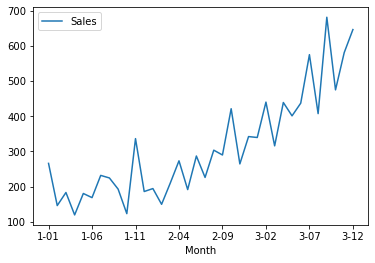

In [31]:
series.plot()
pyplot.show()

In [32]:
X = series.values
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [33]:
size = int(len(X)*0.60)
print(len(X))
print(size)

36
21


In [34]:
train, test = X[0:size],X[size:len(X)]

In [36]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat,obs))
error = mean_squared_error(test,predictions)
print('Test MSE: %.3f' % error)

predicted=272.964489, expected=421.600000
predicted=290.314021, expected=264.500000
predicted=349.117666, expected=342.300000
predicted=306.512973, expected=339.700000
predicted=387.376403, expected=440.400000
predicted=348.154149, expected=315.900000
predicted=386.308845, expected=439.300000
predicted=356.082048, expected=401.300000
predicted=446.379474, expected=437.400000
predicted=394.737257, expected=575.500000
predicted=434.915377, expected=407.600000
predicted=507.923456, expected=682.000000
predicted=435.482949, expected=475.300000
predicted=652.743796, expected=581.300000
predicted=546.343528, expected=646.900000
Test MSE: 7547.806


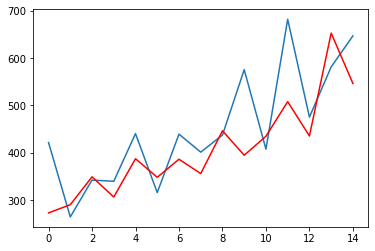

In [37]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()